In [40]:

import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D


In [41]:

def load_data(celltype): 
    data_str = 'result_tables/First_cohort/' + celltype
    items = os.listdir(data_str)
    dfs = {}
    for item in items: 
        if item.endswith('.csv'):
            file_path = os.path.join(data_str, item)
            df = pd.read_csv(file_path)
            dfs[item] = df
    return dfs

In [42]:

ON_alpha = 'ON_Alpha'
ON_alpha_data = load_data(ON_alpha)


OFF_sus = 'OFFsus'
OFF_sus_data = load_data(OFF_sus)

OFF_tr = 'OFFtr'
OFF_tr_data = load_data(OFF_tr)




In [43]:

def plot_lme_results(df, celltype, graph, ylabel):
    title = 'Effect on {} (R2 = {:.2f})'.format(graph,df.loc[df['Name']== 'Rsquared', 'Estimate'].values[0])
    #Exclue intercept and Rsquared from the plott
    var_names = df['Name'][1:-1]
    estimate = df['Estimate'][1:-1]
    lower = df['Lower'][1:-1]
    upper = df['Upper'][1:-1]
    p_values = df['pValue'][1:-1]

 
    fig, ax = plt.subplots()

    # Set color based on celltype
    if celltype == 'ON alpha':
        colors = ['cyan'] * len(var_names)
    elif celltype == 'OFF sustained alpha':
        colors = ['magenta'] * len(var_names)  
    else:
        colors = ['seagreen'] * len(var_names)

    bars = ax.bar(var_names, estimate, color=colors, edgecolor='k')

    # Error bars using 95% CI
    for bar, y, lower_ci, upper_ci, p_value in zip(bars, estimate, lower, upper, p_values):
        ax.errorbar(
            bar.get_x() + bar.get_width() / 2,
            y,
            yerr=[[y - lower_ci], [upper_ci - y]],  
            fmt='k.',
            capsize=5,
            capthick=1,
            elinewidth=1
        )

        
        star_y_position = max(y + upper_ci + 5, y - lower_ci - 5)

        
        if p_value <= 0.015:
            ax.text(bar.get_x() + bar.get_width() / 2, star_y_position-25, '■', ha='center', va='top', color='red')
            #ax.text(bar.get_x() + bar.get_width() / 2, star_y_position + 10, f'p={p_value:.3f}', ha='center', va='bottom', color='black')  # Add p-value
        elif p_value < 0.05:
            ax.text(bar.get_x() + bar.get_width() / 2, star_y_position-5, '*', ha='center', va='top', color='red')
            #ax.text(bar.get_x() + bar.get_width() / 2, star_y_position + 10, f'p={p_value:.3f}', ha='center', va='bottom', color='black')  # Add p-value

    
    legend_elements = [
        Line2D([0], [0], marker='*', color='w', markerfacecolor='red', markersize=10, label='p < 0.05'), 
        Line2D([0], [0], marker='s', color='w', markerfacecolor='red', markersize=10, label='p < 0.01')
        ]

    # Plot error bars for 95% CI in a separate legend. Just weird matplotlib issues
    handles, labels = ax.get_legend_handles_labels()
    handles.append(ax.errorbar([], [], yerr=1, fmt='o', color='k', markersize=5, capsize=5, capthick=1, elinewidth=1))
    labels.append('95% CI')

    
    handles.extend(legend_elements)
    labels.extend(['p < 0.05', 'p < 0.01', '95% CI'])

    
    ax.legend(handles=handles, labels=labels, loc='upper left', bbox_to_anchor=(1, 1))

    ax.set_ylabel(ylabel)
    ax.set_title(title + ' {}'.format(celltype))
    ax.set_xticklabels(var_names, rotation=45, ha='right')
    ax.tick_params(axis='x', labelrotation=45)
    ax.set_xlabel('')

    plt.show()



In [44]:
plot_str = 'lme_peak_size'
ON_df = ON_alpha_data['{}_ON_LME.csv'.format(plot_str)]
ON_df

,Name,Estimate,SE,tStat,DF,pValue,Lower,Upper
0,(Intercept),422.818892,40.373878,10.472586,71,4.777392e-16,342.315666,503.322118
1,genotype_NF1(NF1-KO/WT),64.349284,31.941085,2.014624,71,4.773263e-02,0.660570,128.037998
2,sex_Male,66.481070,35.922660,1.850672,71,6.837681e-02,-5.146679,138.108820
3,which_eye_Right,-9.867454,35.129646,-0.280887,71,7.796141e-01,-79.913978,60.179070
4,quadrant_DT,-187.165207,56.537485,-3.310462,71,1.466080e-03,-299.897749,-74.432664
5,quadrant_VT,-193.388683,70.403827,-2.746849,71,7.619941e-03,-333.769928,-53.007438
6,quadrant_VN,-98.168176,68.103007,-1.441466,71,1.538493e-01,-233.961715,37.625363
7,Rsquared,0.503552,0.000000,0.000000,0,0.000000e+00,0.000000,0.000000


In [45]:
# Function to plot the 3 alphas per condition
def show_plots (plot_str, title, ylabel):
    ON_df = ON_alpha_data['{}_ON_LME.csv'.format(plot_str)]
    OFFsus_df = OFF_sus_data['{}_OFFsus_LME.csv'.format(plot_str)]
    OFFtr_df = OFF_tr_data['{}_OFFtr_LME.csv'.format(plot_str)]
    

    plot_lme_results(ON_df, 'ON alpha', title, ylabel)
    plot_lme_results(OFFsus_df, 'OFF sustained alpha', title, ylabel)
    plot_lme_results(OFFtr_df, 'OFF transient alpha', title, ylabel)

C:\Users\santi\AppData\Local\Temp\ipykernel_20452\2947265953.py:66: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(var_names, rotation=45, ha='right')


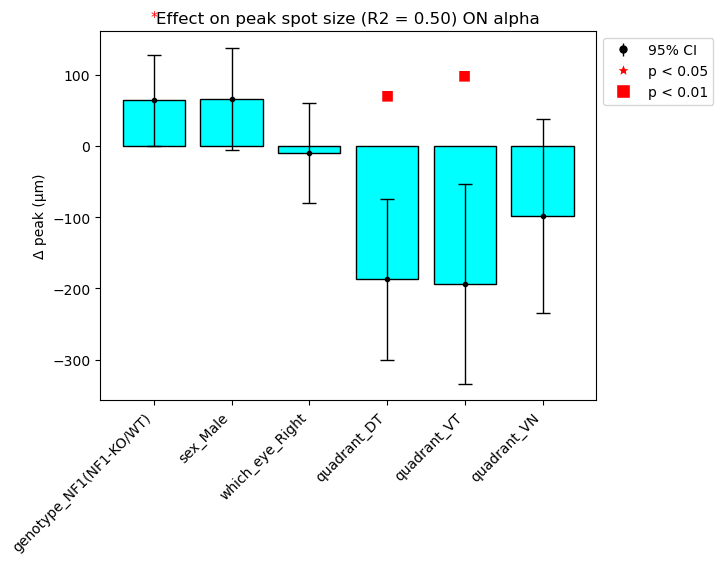

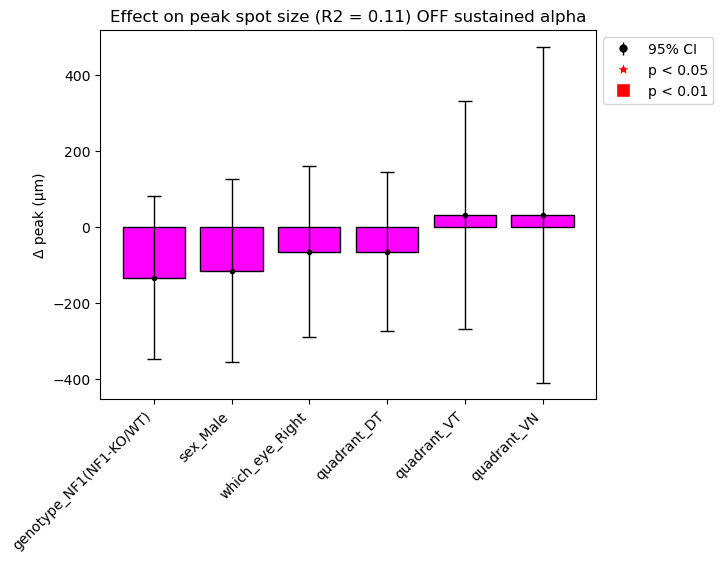

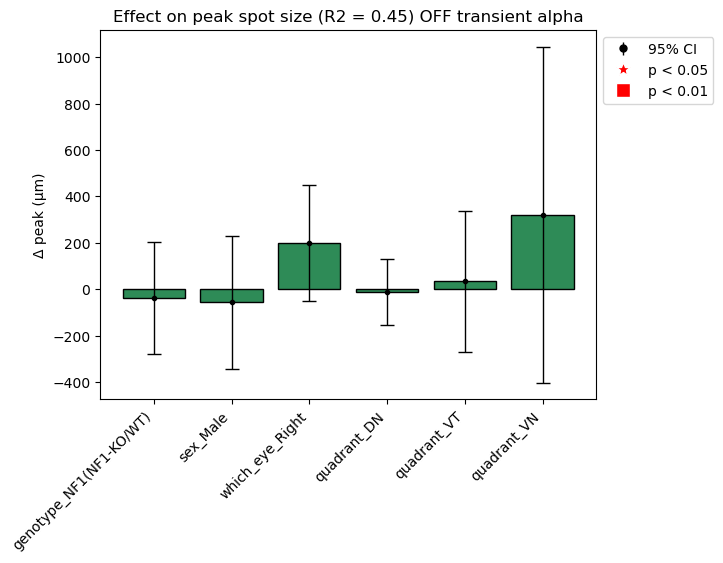

In [46]:
#Plot peak spot size 
show_plots('lme_peak_size', 'peak spot size', 'Δ peak (µm)' )

C:\Users\santi\AppData\Local\Temp\ipykernel_20452\2947265953.py:66: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(var_names, rotation=45, ha='right')


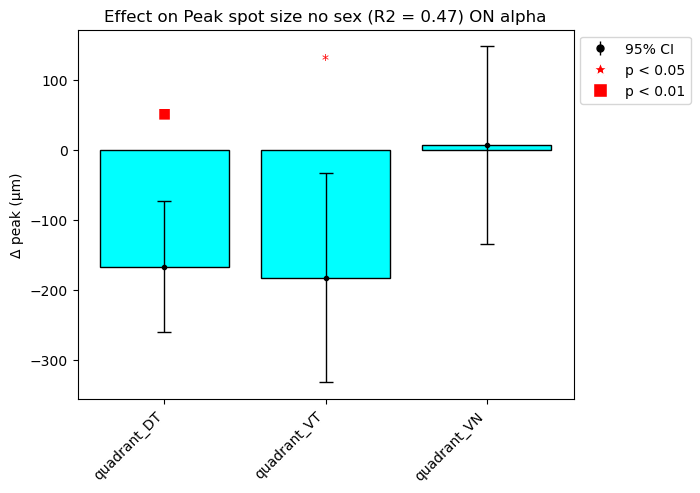

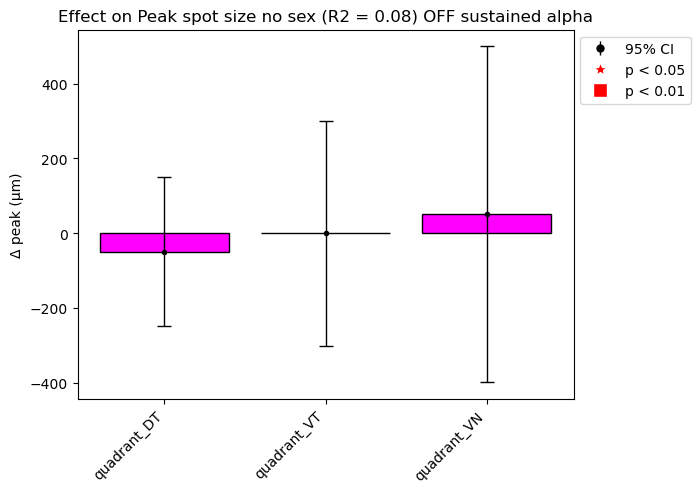

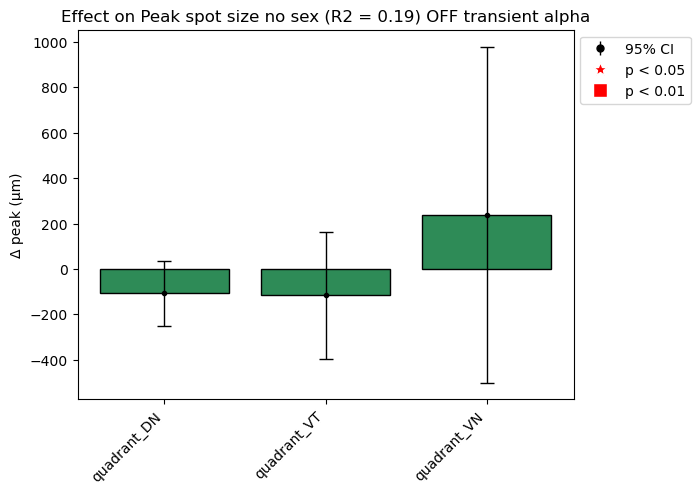

In [47]:
#PLot peak spot size no sex
show_plots('lme_peak_size_nosex', 'Peak spot size no sex', 'Δ peak (µm)')

C:\Users\santi\AppData\Local\Temp\ipykernel_20452\2947265953.py:66: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(var_names, rotation=45, ha='right')


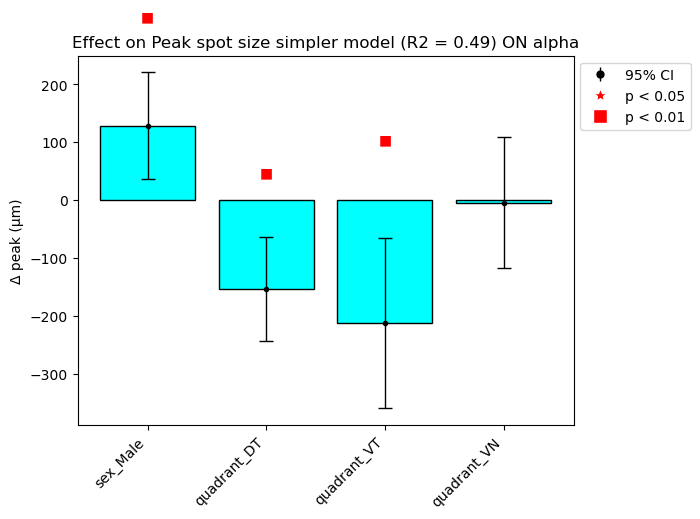

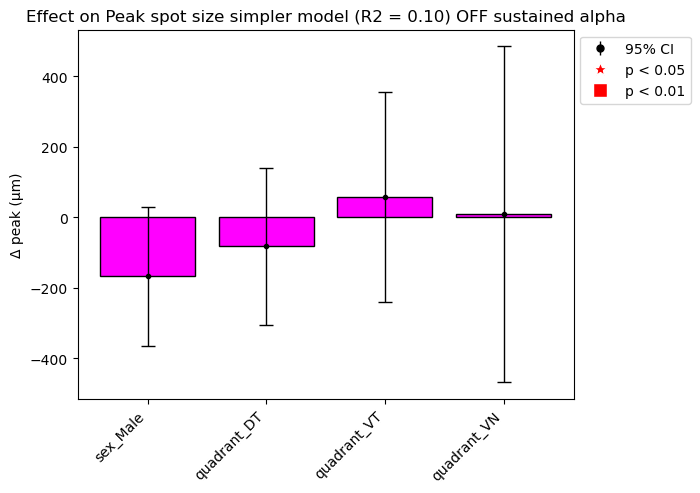

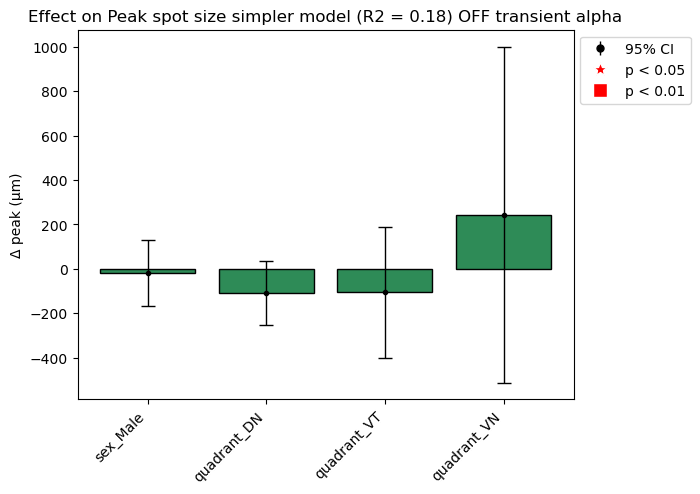

In [48]:
#PLot peak spot size simpler model
show_plots('lme_peak_size_simpler', 'Peak spot size simpler model', 'Δ peak (µm)')

C:\Users\santi\AppData\Local\Temp\ipykernel_20452\2947265953.py:66: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(var_names, rotation=45, ha='right')


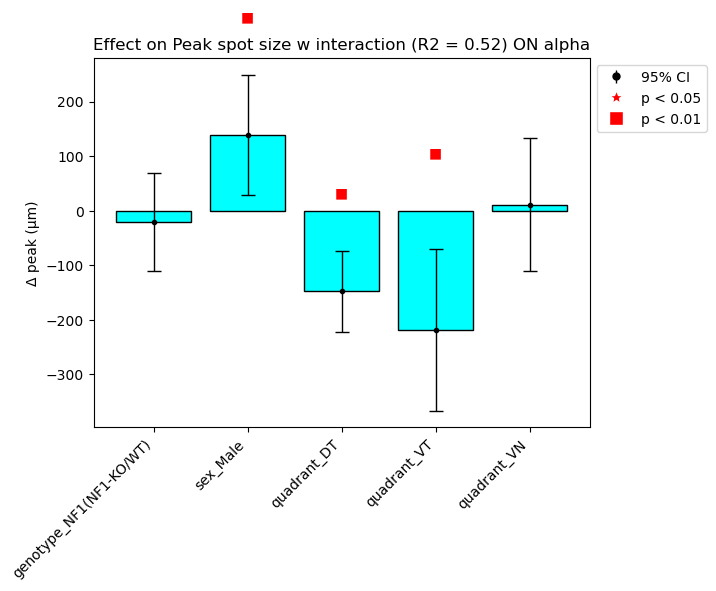

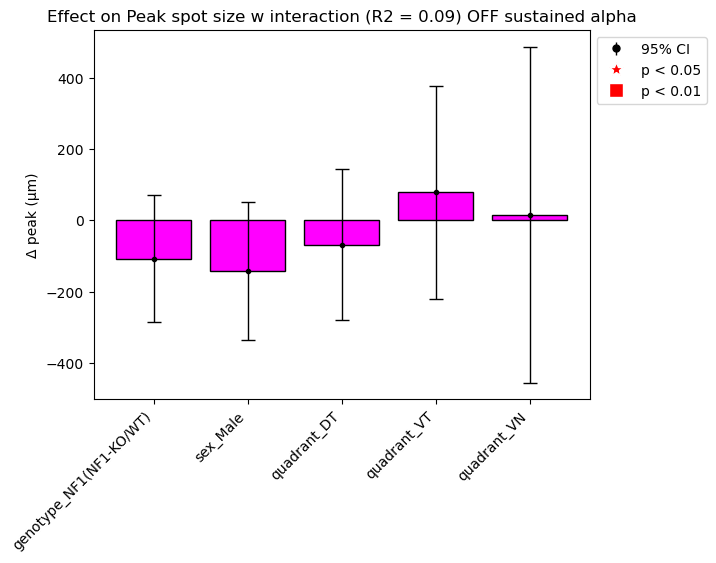

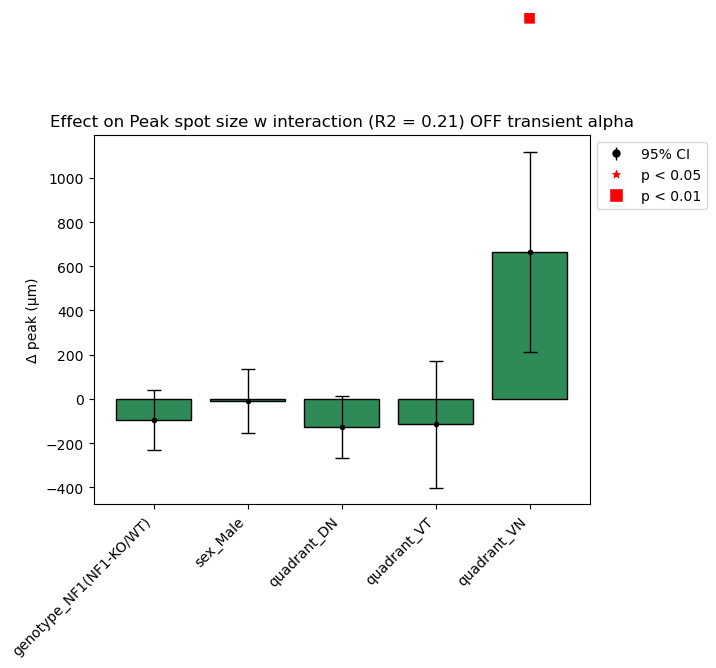

In [49]:
#PLot peak spot size simpler model with interaction
show_plots('lme_peak_size_w_interaction', 'Peak spot size w interaction', 'Δ peak (µm)')

C:\Users\santi\AppData\Local\Temp\ipykernel_20452\2947265953.py:66: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(var_names, rotation=45, ha='right')


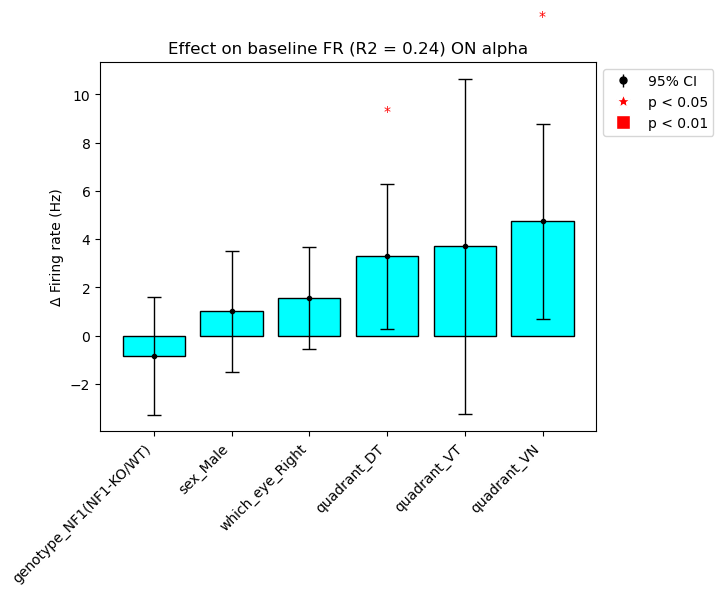

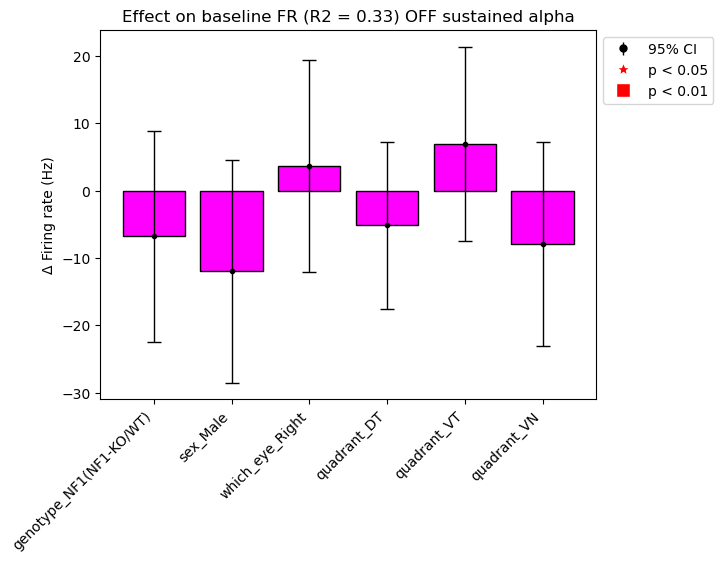

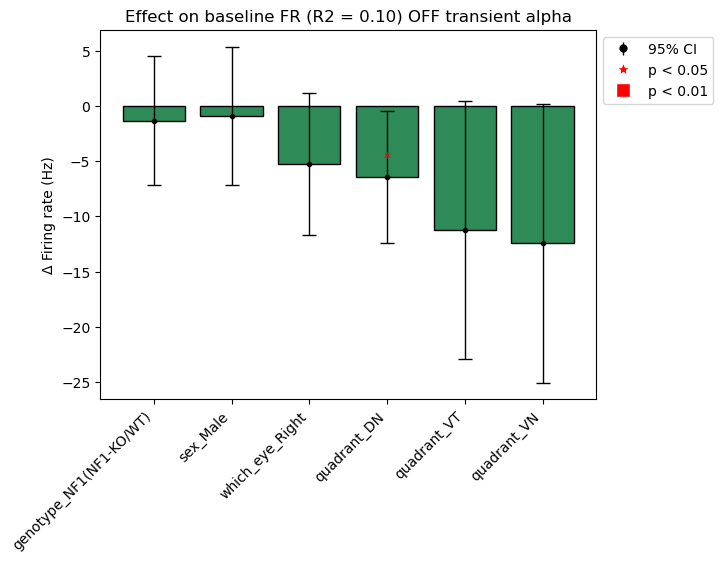

In [50]:
#Plot effect on baseline FR
show_plots('lme_baseline_FR', 'baseline FR', 'Δ Firing rate (Hz)')

C:\Users\santi\AppData\Local\Temp\ipykernel_20452\2947265953.py:66: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(var_names, rotation=45, ha='right')


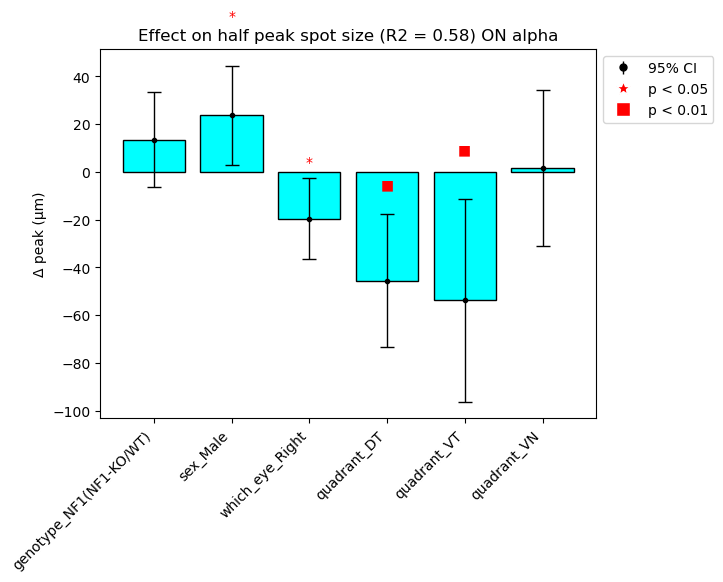

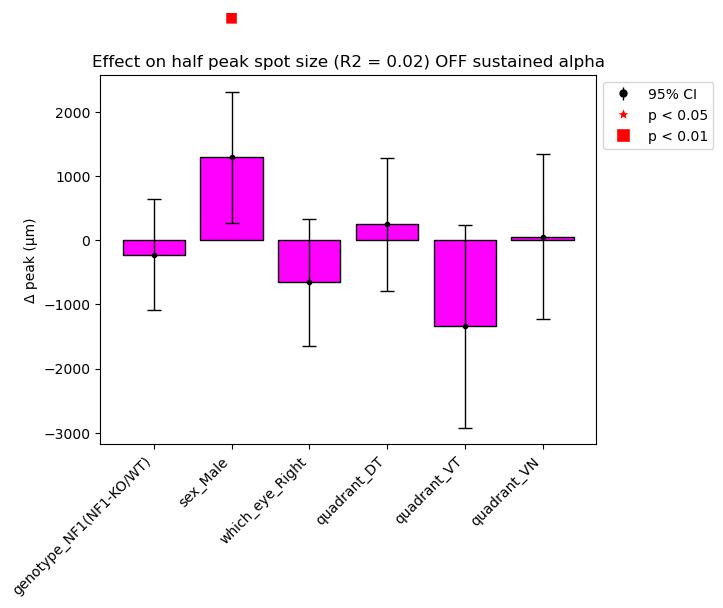

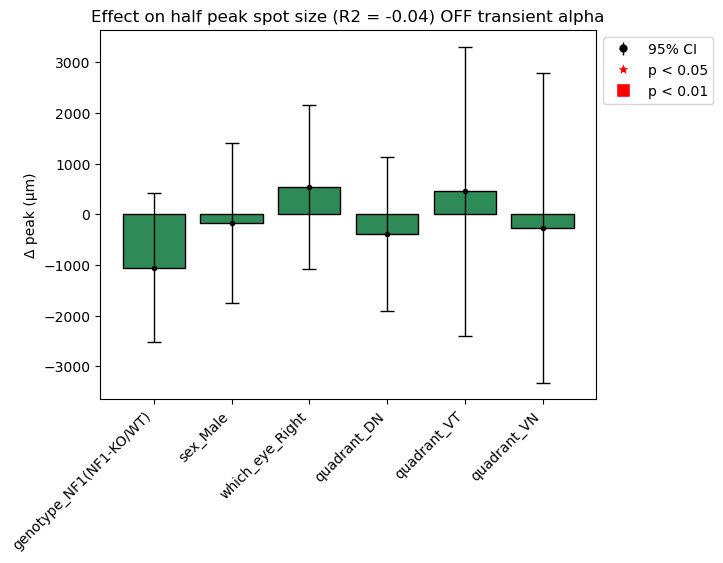

In [51]:
#Plot effect on half peak sixe
show_plots('lme_half_peak_size', 'half peak spot size','Δ peak (µm)')

C:\Users\santi\AppData\Local\Temp\ipykernel_20452\2947265953.py:66: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(var_names, rotation=45, ha='right')


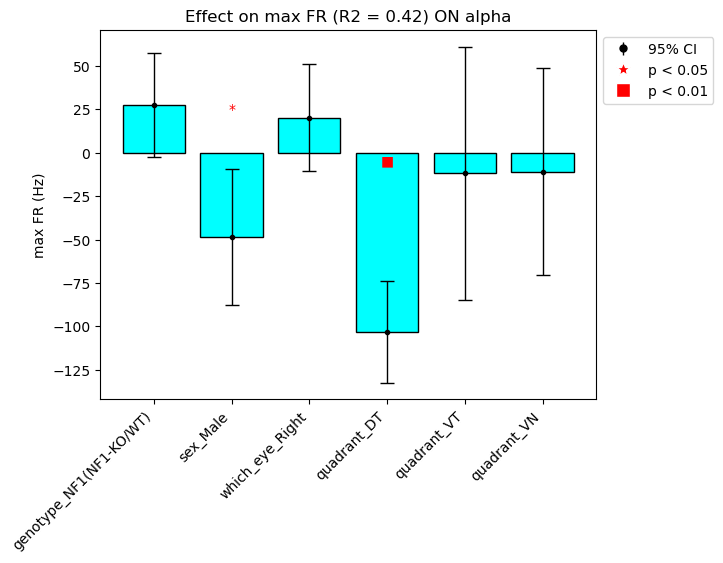

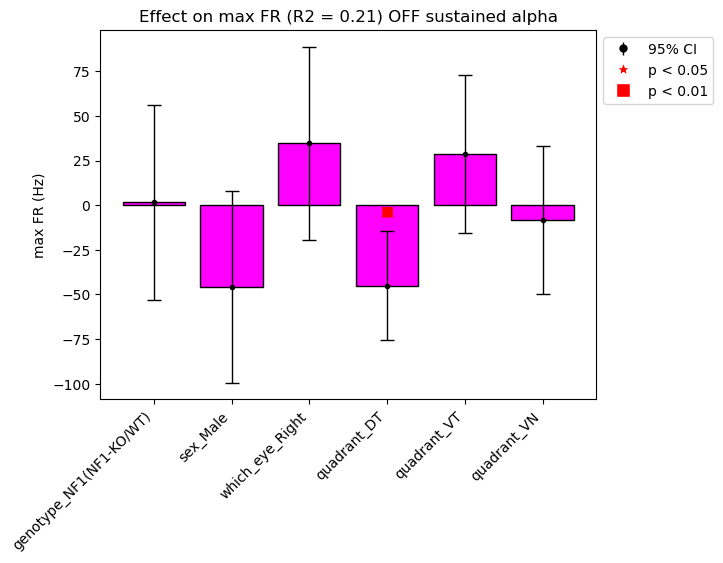

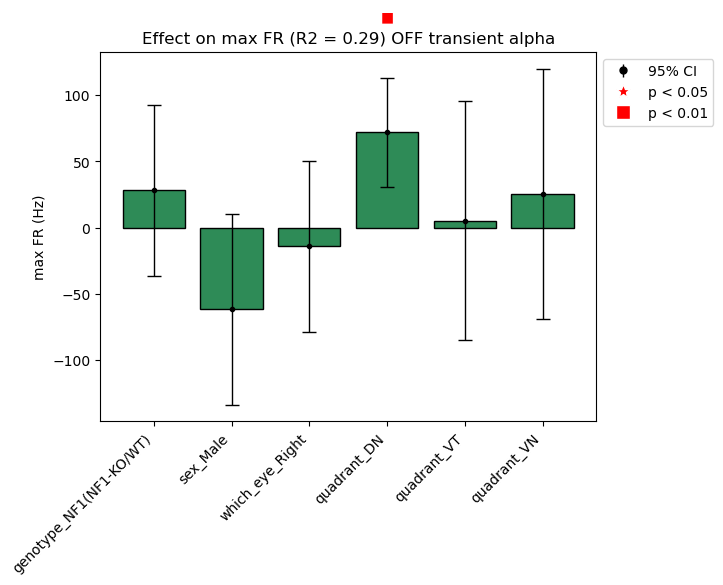

In [52]:
#Plot effect on Max FR
show_plots('lme_max_FR', 'max FR', 'max FR (Hz)')

C:\Users\santi\AppData\Local\Temp\ipykernel_20452\2947265953.py:66: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(var_names, rotation=45, ha='right')


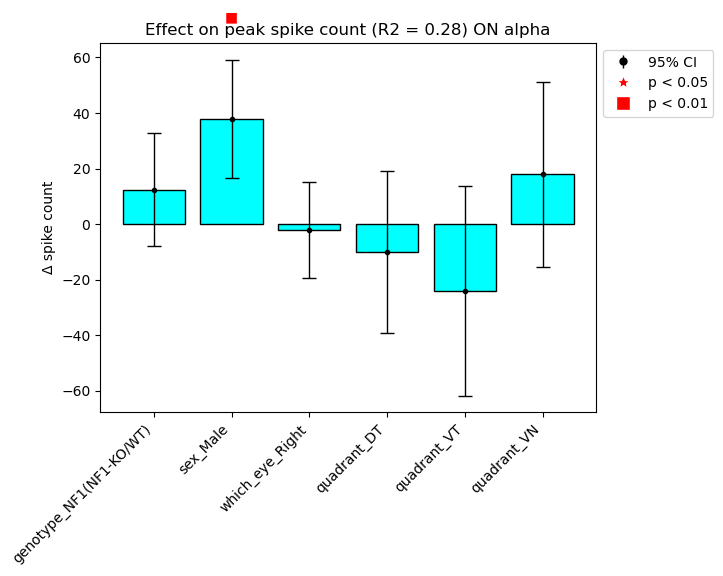

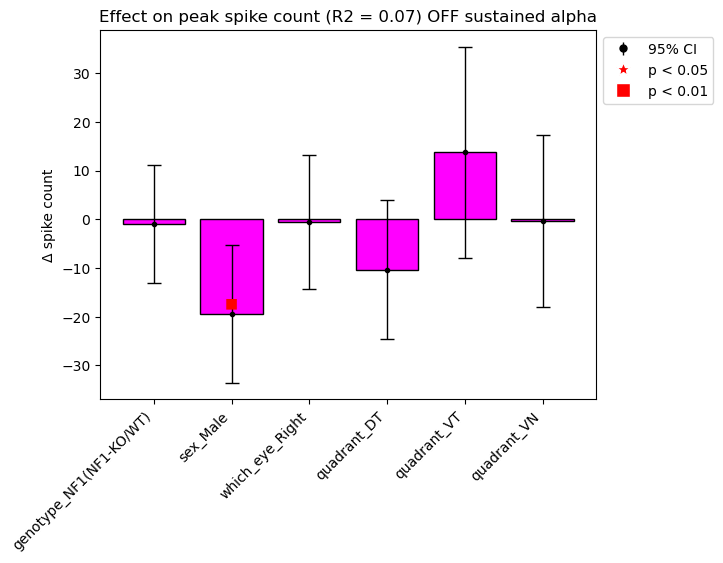

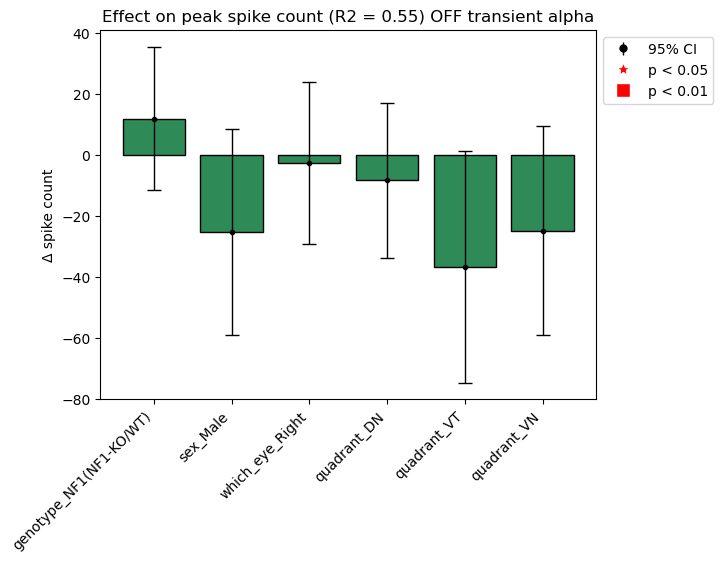

In [53]:
#Plot effect on peak spike count
show_plots('lme_peak_spikes', 'peak spike count', 'Δ spike count')